# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [192]:
# import warnings

# warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn import metrics

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [193]:
#defining a histogram boxplot view 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [194]:
# class provided function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Data Overview

- Observations
    - Data rows match items in data dictionary 
    - Some variables will need to adjusted to dummy variables, including 
        - type_of_meal_plan
        - room_type_reserved
        - market_segment_type
        - booking_status
    - already formatted as 1,0 
        - required_car_parking_space
        - repeated_guest
    - Many are already formatted as continuous 
        - no_of_adults
        - no_of_children
        - no_of_weekend_nights
        - no_of_week_nights	
        - lead_time
        - arrival_year
        - arrival_month
        - arrival_date
        - no_of_previous_cancellations
        - no_of_previous_bookings_not_canceled
        - avg_price_per_room
        - no_of_special_requests
    - 36K rows, 19 columns 
    - data types match, no changes needed 
    - There are no nulls in the data 
   
   
- Sanity checks
    - Average booking has 
        - 1-2 adults
        - No children 
        - 1 weekend night 
        - 2 week nights 
        - no parking space 
        - 2 months lead time
        - book in summer (August) 
        - book mid-month 
        - are a new guest 
        - have 0 previous cancellations 
        - $100 
        - no special requests 
    - Most rooms chose 
        - Room type 1
        - Meal plan 1
        - Booked online 
     - 1/3 of bookings cancelled (wow!) 

In [195]:
# Loading the dataset
data = pd.read_csv("INNHotelsGroup.csv")

In [196]:
#loading the first few rows of data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [197]:
#loading the shape of the dataset 
data.shape

(36275, 19)

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [199]:
#summary description of data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [200]:
# Making a list of all catrgorical variables
cat_col = [
    "booking_status",
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
]

#printing % of total dataset for unique values in each categorical variable 

for column in cat_col:
        print(data[column].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
        print("")
        print("- "*20)
        print("")

Not_Canceled    67.24%
Canceled        32.76%
Name: booking_status, dtype: object

- - - - - - - - - - - - - - - - - - - - 

Meal Plan 1     76.73%
Not Selected    14.14%
Meal Plan 2      9.11%
Meal Plan 3      0.01%
Name: type_of_meal_plan, dtype: object

- - - - - - - - - - - - - - - - - - - - 

Room_Type 1    77.55%
Room_Type 4     16.7%
Room_Type 6     2.66%
Room_Type 2     1.91%
Room_Type 5     0.73%
Room_Type 7     0.44%
Room_Type 3     0.02%
Name: room_type_reserved, dtype: object

- - - - - - - - - - - - - - - - - - - - 

Online           63.99%
Offline          29.02%
Corporate         5.56%
Complementary     1.08%
Aviation          0.34%
Name: market_segment_type, dtype: object

- - - - - - - - - - - - - - - - - - - - 



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
    - The top 3 busiest months are the fall time - October, then September, then August
    - This is closely followed by the 2 months beside this period, June and July then November and December 
2. Which market segment do most of the guests come from?
    - Online is by far the most common market segment type 
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
    - distribution for all rates is normal around a ~$100 average, with a spike around $0 
    - That $0 spike shows up in  Complementary markets (logical, as those rooms are free) and Online (perhaps there is a coupon or points system that you can redeem online?)  
    - Online and Offline otherwise  follow the typical distribution
    - Corporate has a tighter distribution with a spike around $65 which I assume is the typical discount rate for partnered businesses 
    - Aviation also follows the typical spread but with fewer outliers
        - possibly due to lower booking total 
        - Could also be similar to corporate with a specific aviation partner price 
4. What percentage of bookings are canceled? 
    - 32.76% of all bookings are cancelled 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
    - Only 1.7% of bookings are cancelled from repeat guests! 
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
    - The less special requests that are made, the more likely they are to cancel 
    - almost even split between cancelled and not cancelled for 0 requests, 60/30 for 1 request, and even less for 2 requests. Almost no cancellations for more special requests 
    - I verified if this distribution of special requests was different for return customers, and it was not
    
**Additional Questions**:
- Is there any cancellation correlation for each segment? Are there any possible multicollinearities between segments?
    - Looking at a heat map, you can see a few moderately strong correlations (higher than 0.5) 
        - Postive correlation higher than 0.5 between repeated_guest and number of previous bookings not cancelled, but slightly less strongly correlated also with number of previous cancellations 
            - this is because the only people who can have previous bookings canceled or not cancelled are repeat guests
        - average price of room is slightly correlated with both number of adults and children
            - the more people, the bigger the room, the pricier the booking 
        - arrival month and arrival year are slightly negatively correlated
            - disregarding this however because the time frame only covers 2 years 

- After prepping the data with dummy variables, will review again for any groupings that may be strongly correlated with cancelled bookings 

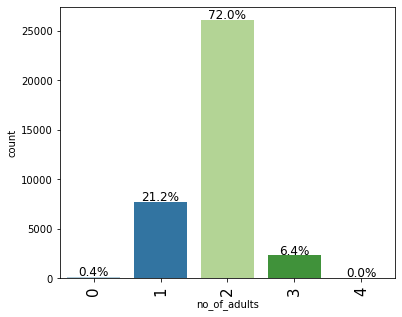

In [201]:
#barplot for no_of_adults 
labeled_barplot(data, "no_of_adults", perc=True)

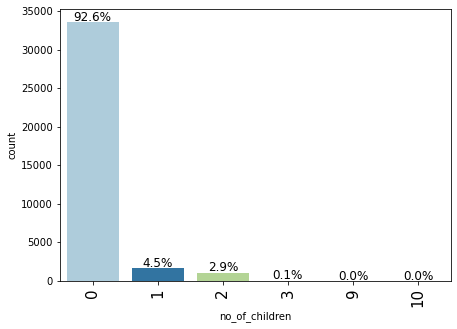

In [202]:
#barplot for no_of_children 
labeled_barplot(data, "no_of_children", perc=True)

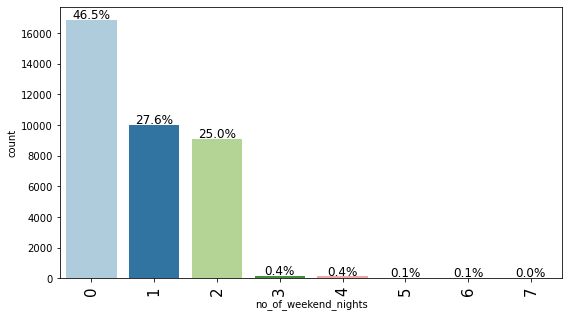

In [203]:
#barplot for no_of_weekend_nights                   
labeled_barplot(data, "no_of_weekend_nights", perc=True)

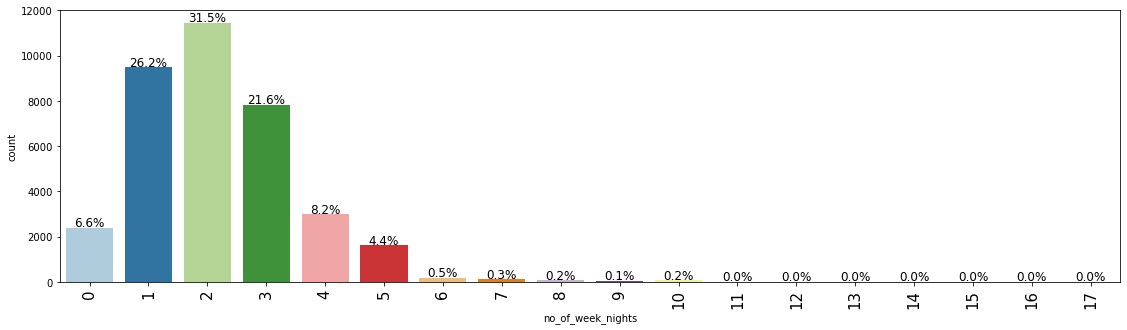

In [204]:
#barplot for no_of_week_nights                                        
labeled_barplot(data, "no_of_week_nights", perc=True)

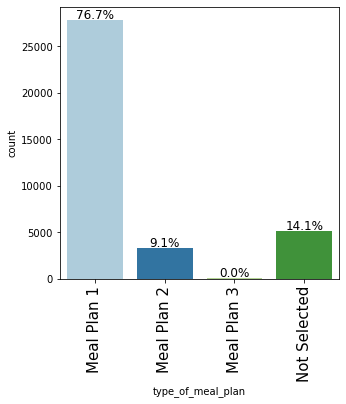

In [205]:
#barplot for type_of_meal_plan                                                             
labeled_barplot(data, "type_of_meal_plan", perc=True)

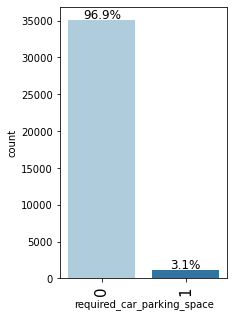

In [206]:
#barplot for required_car_parking_space                                                                         
labeled_barplot(data, "required_car_parking_space", perc=True)

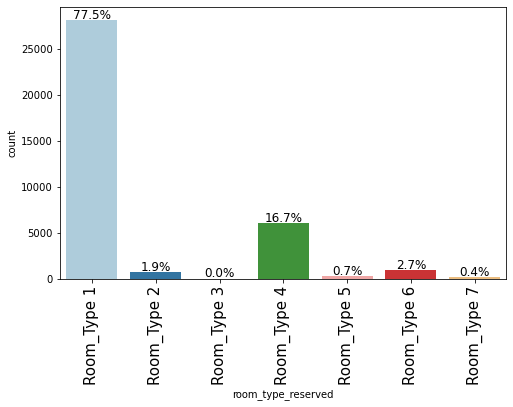

In [207]:
#barplot for required_car_parking_space                                                                         
labeled_barplot(data, "room_type_reserved", perc=True)

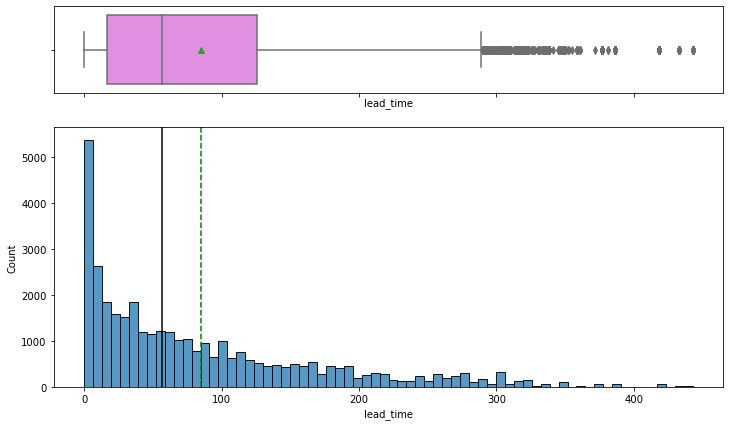

In [208]:
#histogram_boxplot for lead_time
histogram_boxplot(data, "lead_time")

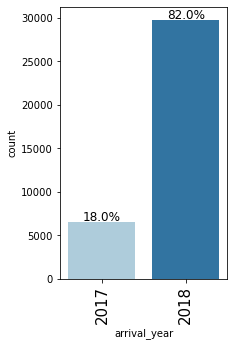

In [209]:
#barplot for arrival_year                                                                                                   
labeled_barplot(data, "arrival_year", perc=True)

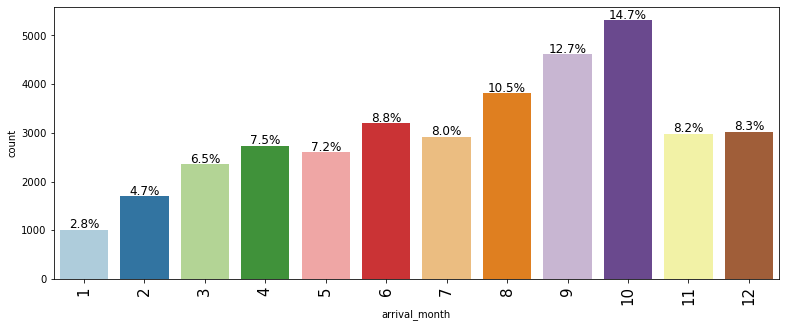

In [210]:
#barplot for arrival_month                                                                                                   
labeled_barplot(data, "arrival_month", perc=True)

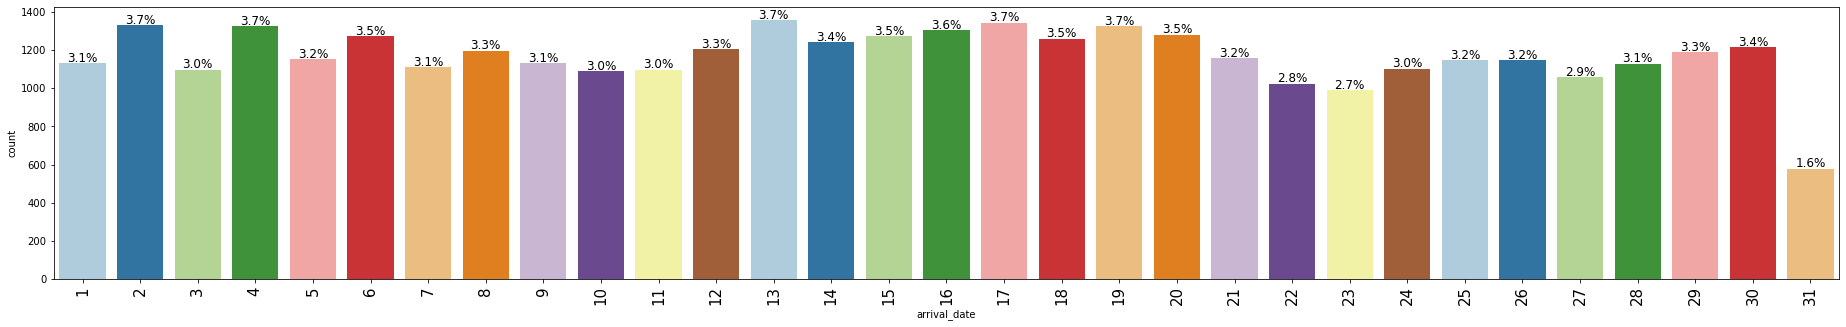

In [211]:
#barplot for arrival_date                                                                                                                             
labeled_barplot(data, "arrival_date", perc=True)

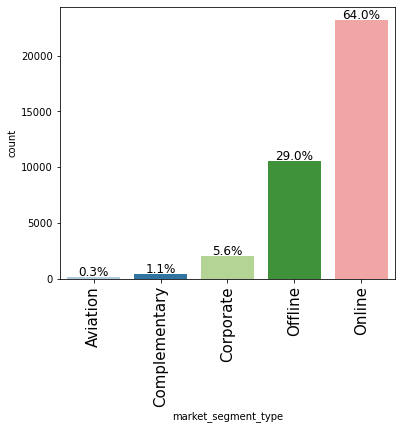

In [212]:
#barplot for market_segment_type                                                                                                                                                
labeled_barplot(data, "market_segment_type", perc=True)

In [213]:
#naming some subsets for each market_segment_type 
data_online = data [ (data['market_segment_type'] == 'Online')]
data_offline = data [ (data['market_segment_type'] == 'Offline')]
data_corporate = data [ (data['market_segment_type'] == 'Corporate')]
data_Complementary = data [ (data['market_segment_type'] == 'Complementary')]
data_Aviation = data [ (data['market_segment_type'] == 'Aviation')]

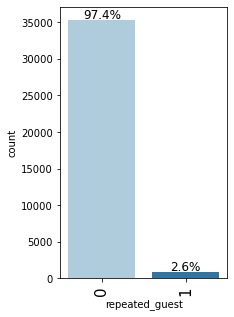

In [214]:
#barplot for repeated_guest                                                                                                                                                
labeled_barplot(data, "repeated_guest", perc=True)

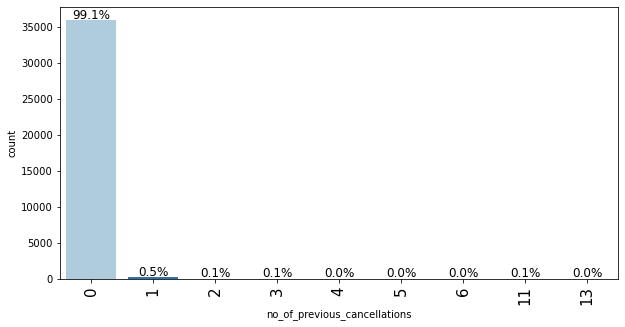

In [215]:
#barplot for no_of_previous_cancellations                                                                                                                                                          
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

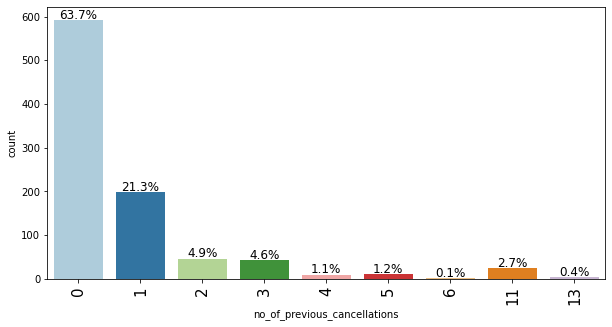

In [216]:
#making subset for just repeat guests to show number of previous cancellations without the new guest skew 
data_repeat_guests = data [ (data['repeated_guest'] == 1)]

#repeating no_of_previous_cancellations barplot with this subset
labeled_barplot(data_repeat_guests, "no_of_previous_cancellations", perc=True)

<function matplotlib.pyplot.show(close=None, block=None)>

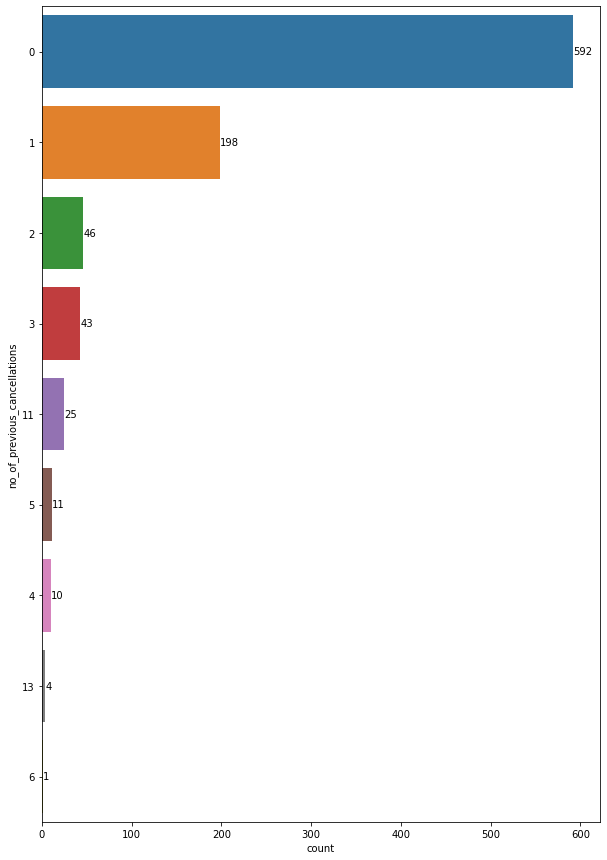

In [217]:
#barplot for no_of_previous_bookings_not_canceled using abvove subset with only repeat customers 
plt.figure(figsize=(10, 15))

ax = sns.countplot(data=data_repeat_guests,y='no_of_previous_cancellations', order = data_repeat_guests['no_of_previous_cancellations'].value_counts().index)
abs_values = data_repeat_guests['no_of_previous_cancellations'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show


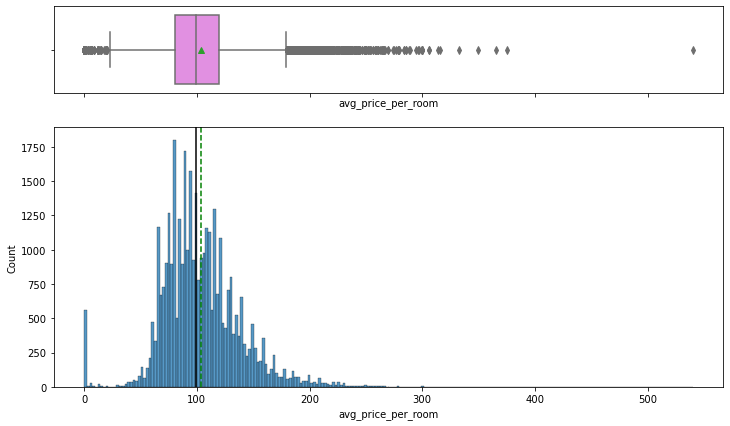

In [218]:
#histogram_boxplot for avg_price_per_room                    
histogram_boxplot(data, "avg_price_per_room")

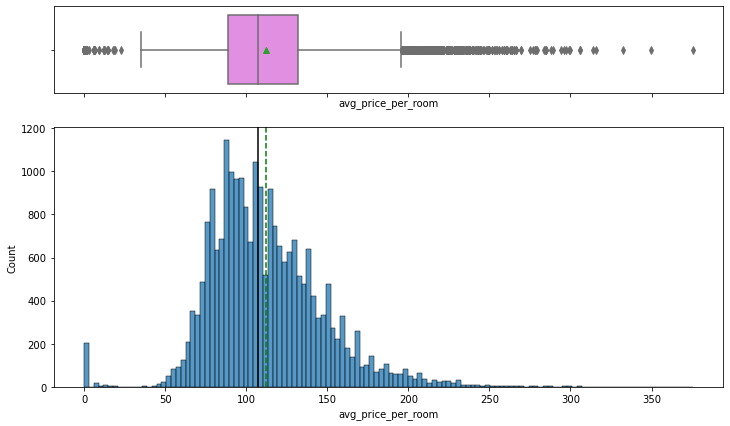

In [219]:
#for online market 
histogram_boxplot(data_online, "avg_price_per_room")

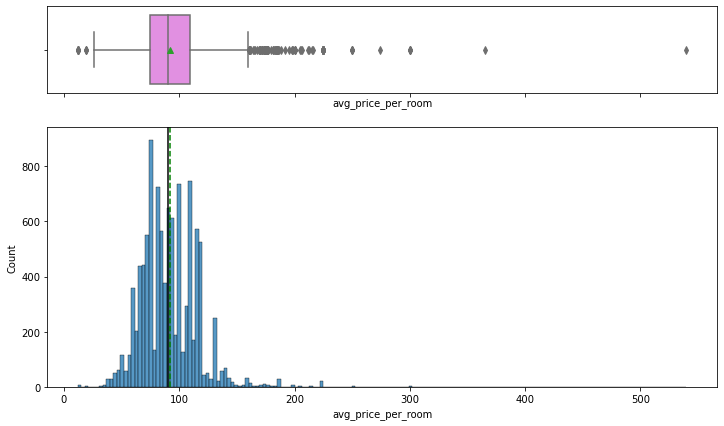

In [220]:
#for data_offline market 
histogram_boxplot(data_offline, "avg_price_per_room")

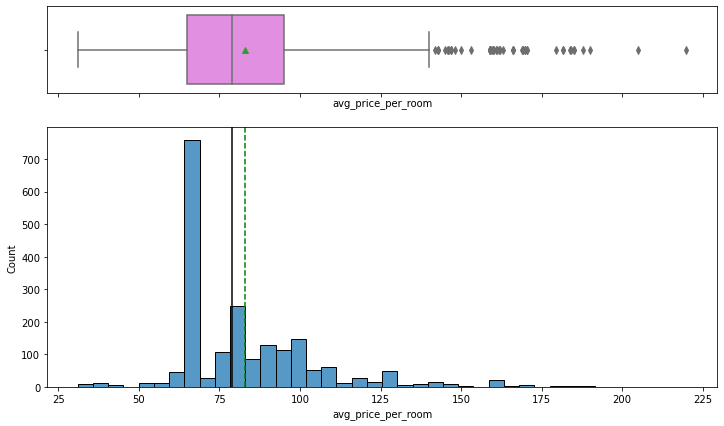

In [221]:
#for data_corporate market 
histogram_boxplot(data_corporate, "avg_price_per_room")

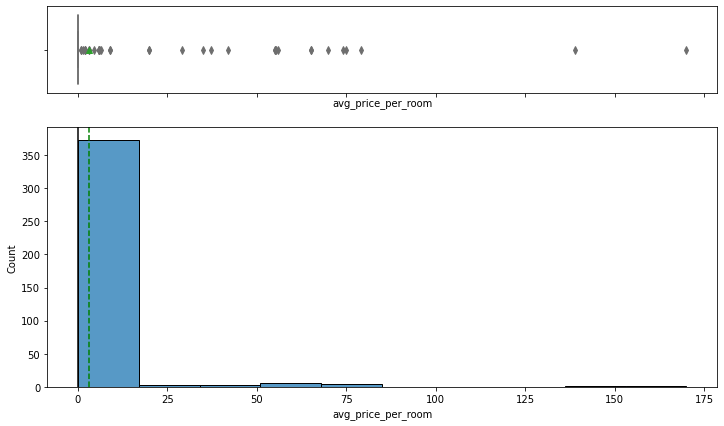

In [222]:
#for data_Complementary market 
histogram_boxplot(data_Complementary, "avg_price_per_room")

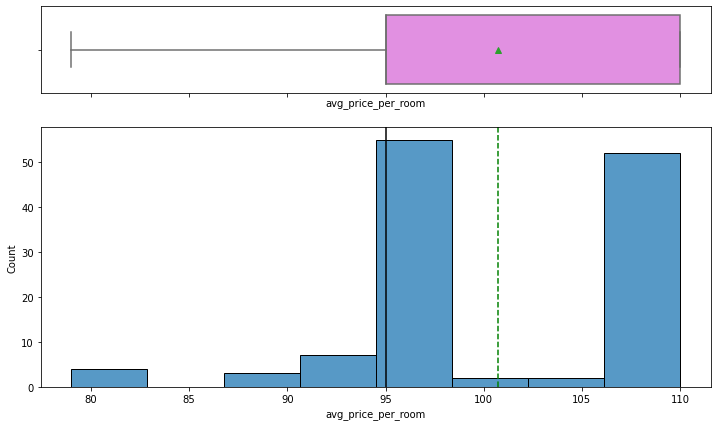

In [223]:
#for data_Aviation market 
histogram_boxplot(data_Aviation, "avg_price_per_room")

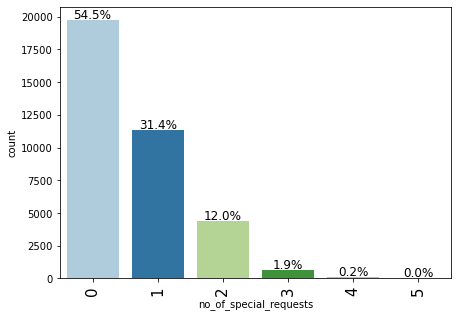

In [224]:
#barchart for no_of_special_requests                
labeled_barplot(data, "no_of_special_requests", perc=True)

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

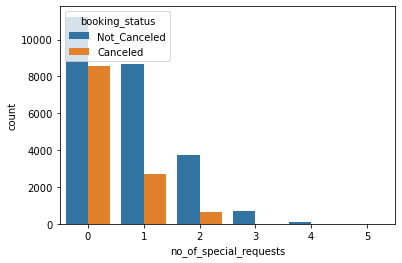

In [225]:
#splitting no_of_special_requests into booking status 
sns.countplot(data = data, x='no_of_special_requests',hue='booking_status')

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

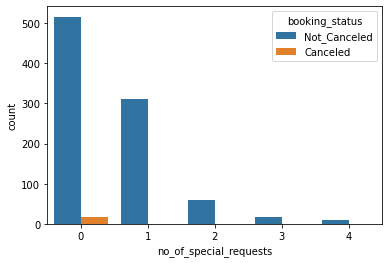

In [226]:
#verifying the same split for only request guests. 
#no noticable difference in distribution of number of special requests
# only cancellations show up in 0 requets bucket, similar to new guests  
sns.countplot(data = data_repeat_guests, x='no_of_special_requests',hue='booking_status')

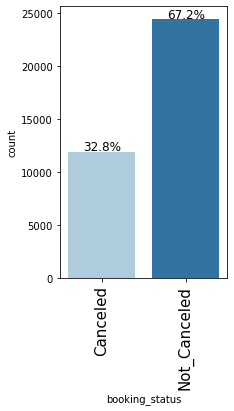

In [227]:
#barchart for booking status for all bookings                 
labeled_barplot(data, "booking_status", perc=True)

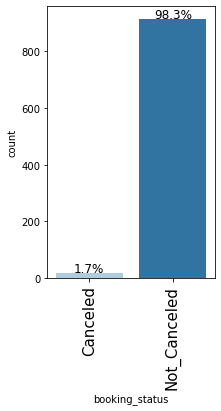

In [228]:
#same barchart for booking status for just repeat guests 
labeled_barplot(data_repeat_guests, "booking_status", perc=True)

#significantly lower! 

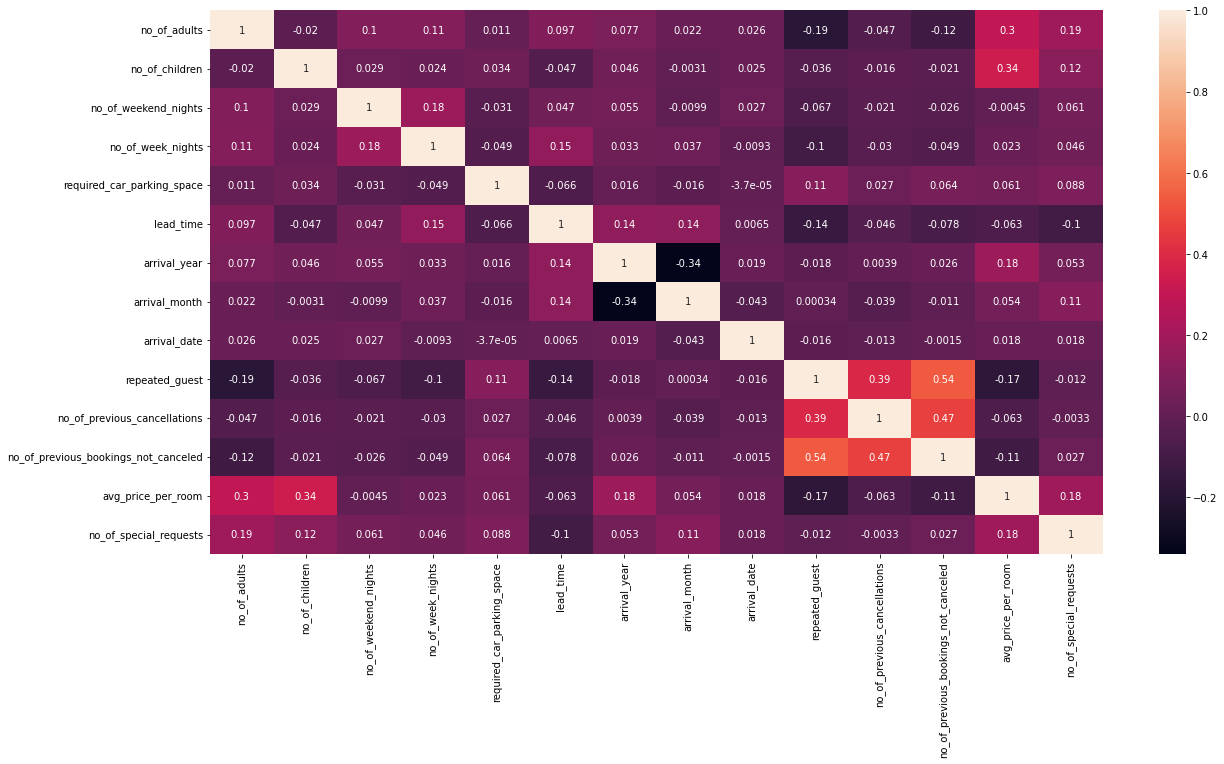

In [229]:
#Heatmap for correlation across all variables 
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
#color intensity 
plt.show()


## Data Preprocessing

- Missing value treatment (if needed)
    - there are no values showing NaN 
- Feature engineering (if needed)
    - room_type_reserved
    - type_of_meal_plan
    - market_segment_type
- Outlier detection and treatment (if needed)
    - outliers fall within typical spread of data and are important for analysis (ex: $0 room spike) 
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [230]:
# class provided function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [231]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [232]:
#creating a copy of the data 
data2 = data.copy()

In [233]:
data2.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [234]:
#removing Booking_ID and arrival_year from dataset as both will not be useful for model
data3 = data2.copy().drop(["Booking_ID","arrival_year"], axis=1)
data3.head().T

,0,1,2,3,4
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_month,10,11,2,5,4
arrival_date,2,6,28,20,11


In [235]:
#replacing booking_status "Not_Canceled" with 0 and "Canceled" with 1 for dummy option 
data3['booking_status'] = data3['booking_status'].replace("Canceled",1)
data3['booking_status'] = data3['booking_status'].replace("Not_Canceled",0)
data3['booking_status'] = data3['booking_status'].astype(float)
data3.head().T

,0,1,2,3,4
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_month,10,11,2,5,4
arrival_date,2,6,28,20,11


In [236]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [237]:
#splitting out target 
X = data3.drop("booking_status", axis=1)
Y = data3["booking_status"]

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0


In [238]:
#creating dummy variables 
X = pd.get_dummies(X, drop_first=True)

X.head()

#confirmed that the 3 object columns have been translated to dummy variables 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,11,6,0,0,0,106.68,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2,28,0,0,0,60.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,5,20,0,0,0,100.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,4,11,0,0,0,94.50,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [239]:
# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

C:\Users\abramhall\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## EDA

- It is a good idea to explore the data once again after manipulating it.

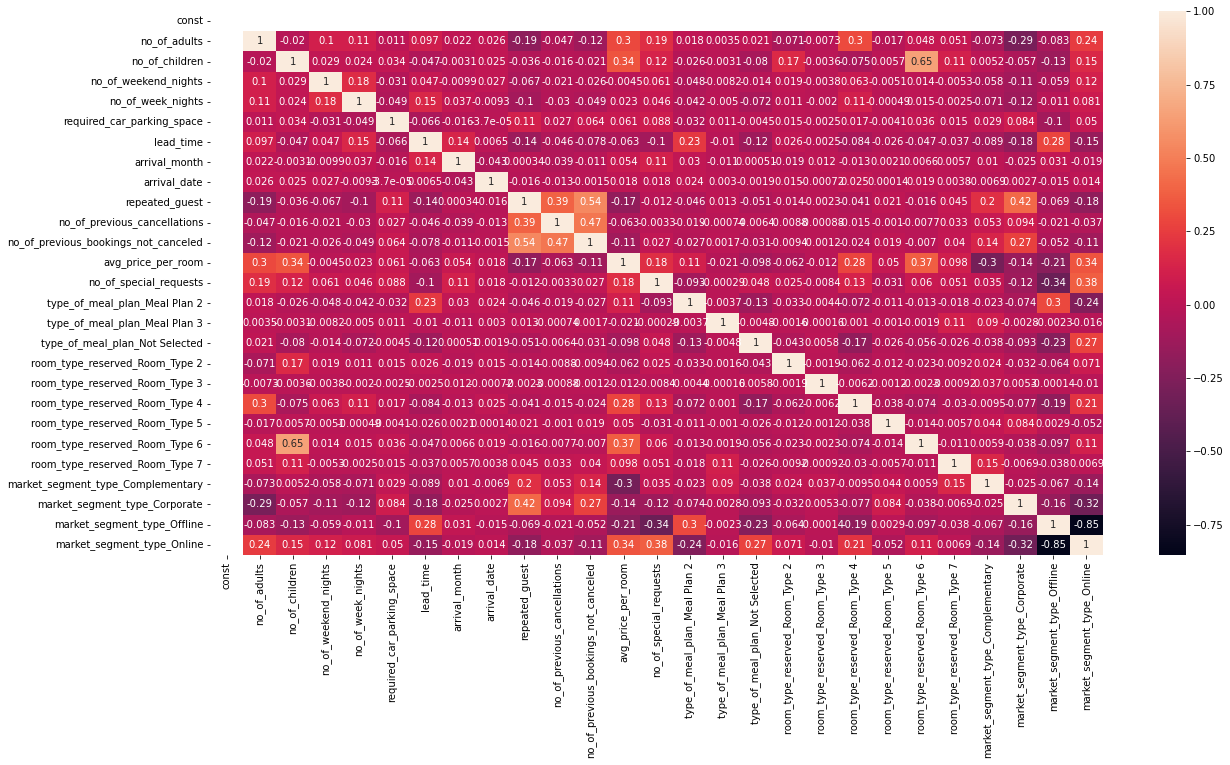

In [240]:
#Heatmap for correlation across all variables 
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)
#color intensity 
plt.show()

With the dummy variable split, a few additional correlations are clear: 

- no_of_children 0.65 to room type 6
- repeated_guest 0.42 to Corporate market segment  
- avg_price_per_room 0.34 to Online market segment 
- no_of_special_requests 0.38 to Online market segment 
    - most likely because it's easier to request things without having someone stare at you the whole time 
- meal plan type 2 0.3 to Offline market segment 
    - perhaps a print coupon? 
- corporate is also slightly less likely to cancel (0.27) 

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [241]:
#running VIF on data to see any multicollinearity 
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series1 VIF: \n\n{}\n".format(vif_series))

Series1 VIF: 

const                                   329.505354
no_of_adults                              1.346585
no_of_children                            1.977636
no_of_weekend_nights                      1.068131
no_of_week_nights                         1.095607
required_car_parking_space                1.039747
lead_time                                 1.246298
arrival_month                             1.053658
arrival_date                              1.006728
repeated_guest                            1.781384
no_of_previous_cancellations              1.394562
no_of_previous_bookings_not_canceled      1.647301
avg_price_per_room                        1.936214
no_of_special_requests                    1.245328
type_of_meal_plan_Meal Plan 2             1.203489
type_of_meal_plan_Meal Plan 3             1.025214
type_of_meal_plan_Not Selected            1.236691
room_type_reserved_Room_Type 2            1.100684
room_type_reserved_Room_Type 3            1.003235
room_type_reserv

In [242]:
#dropping highest VIF variable: market_segment_type_Online 
X_train2 = X_train.drop(["market_segment_type_Online"],axis=1)

X_train2.head()


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline
13662,1.0,1,0,0,1,0,163,10,15,0,0,0,115.00,0,0,0,0,0,0,0,0,0,0,0,0,1
26641,1.0,2,0,0,3,0,113,3,31,0,0,0,78.15,1,0,0,0,1,0,0,0,0,0,0,0,0
17835,1.0,2,0,2,3,0,359,10,14,0,0,0,78.00,1,0,0,0,0,0,0,0,0,0,0,0,1
21485,1.0,2,0,0,3,0,136,6,29,0,0,0,85.50,0,0,0,1,0,0,0,0,0,0,0,0,0
5670,1.0,2,0,1,2,0,21,8,15,0,0,0,151.00,0,0,0,0,0,0,0,0,0,0,0,0,0


In [243]:
#re-running VIF X_train2
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)
print("vif_series2: \n\n{}\n".format(vif_series2))

#market_segment_type_Offline VIF score tanked without Online - those were my problem children 
#no other high VIF scores to remove 

vif_series2: 

const                                   41.772953
no_of_adults                             1.329764
no_of_children                           1.976814
no_of_weekend_nights                     1.067628
no_of_week_nights                        1.095072
required_car_parking_space               1.039627
lead_time                                1.243850
arrival_month                            1.053492
arrival_date                             1.006712
repeated_guest                           1.777826
no_of_previous_cancellations             1.394275
no_of_previous_bookings_not_canceled     1.647140
avg_price_per_room                       1.935996
no_of_special_requests                   1.240711
type_of_meal_plan_Meal Plan 2            1.203426
type_of_meal_plan_Meal Plan 3            1.025214
type_of_meal_plan_Not Selected           1.235493
room_type_reserved_Room_Type 2           1.100486
room_type_reserved_Room_Type 3           1.003235
room_type_reserved_Room_Type 4     

In [244]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   required_car_parking_space            25392 non-null  int64  
 6   lead_time                             25392 non-null  int64  
 7   arrival_month                         25392 non-null  int64  
 8   arrival_date                          25392 non-null  int64  
 9   repeated_guest                        25392 non-null  int64  
 10  no_of_previous_cancellations          25392 non-null  int64  
 11  no_of_previ

In [245]:
#making a copy and changing everything to float - getting errors attempting to apply logit
X_train3 = X_train2.copy()

X_train3['no_of_adults'] = X_train3['no_of_adults'].astype(float)
X_train3['no_of_children'] = X_train3['no_of_children'].astype(float)
X_train3['no_of_weekend_nights'] = X_train3['no_of_weekend_nights'].astype(float)
X_train3['no_of_week_nights'] = X_train3['no_of_week_nights'].astype(float)
X_train3['required_car_parking_space'] = X_train3['required_car_parking_space'].astype(float)
X_train3['lead_time'] = X_train3['lead_time'].astype(float)
X_train3['arrival_month'] = X_train3['arrival_month'].astype(float)
X_train3['arrival_date'] = X_train3['arrival_date'].astype(float)
X_train3['repeated_guest'] = X_train3['repeated_guest'].astype(float)
X_train3['no_of_previous_cancellations'] = X_train3['no_of_previous_cancellations'].astype(float)
X_train3['no_of_previous_bookings_not_canceled'] = X_train3['no_of_previous_bookings_not_canceled'].astype(float)
X_train3['avg_price_per_room'] = X_train3['avg_price_per_room'].astype(float)
X_train3['no_of_special_requests'] = X_train3['no_of_special_requests'].astype(float)
X_train3['type_of_meal_plan_Meal Plan 2'] = X_train3['type_of_meal_plan_Meal Plan 2'].astype(float)
X_train3['type_of_meal_plan_Meal Plan 3'] = X_train3['type_of_meal_plan_Meal Plan 3'].astype(float)
X_train3['type_of_meal_plan_Not Selected'] = X_train3['type_of_meal_plan_Not Selected'].astype(float)
X_train3['room_type_reserved_Room_Type 2'] = X_train3['room_type_reserved_Room_Type 2'].astype(float)
X_train3['room_type_reserved_Room_Type 3'] = X_train3['room_type_reserved_Room_Type 3'].astype(float)
X_train3['room_type_reserved_Room_Type 4'] = X_train3['room_type_reserved_Room_Type 4'].astype(float)
X_train3['room_type_reserved_Room_Type 5'] = X_train3['room_type_reserved_Room_Type 5'].astype(float)
X_train3['room_type_reserved_Room_Type 6'] = X_train3['room_type_reserved_Room_Type 6'].astype(float)
X_train3['room_type_reserved_Room_Type 7'] = X_train3['room_type_reserved_Room_Type 7'].astype(float)
X_train3['market_segment_type_Complementary'] = X_train3['market_segment_type_Complementary'].astype(float)
X_train3['market_segment_type_Corporate'] = X_train3['market_segment_type_Corporate'].astype(float)
X_train3['market_segment_type_Offline'] = X_train3['market_segment_type_Offline'].astype(float)

X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  float64
 2   no_of_children                        25392 non-null  float64
 3   no_of_weekend_nights                  25392 non-null  float64
 4   no_of_week_nights                     25392 non-null  float64
 5   required_car_parking_space            25392 non-null  float64
 6   lead_time                             25392 non-null  float64
 7   arrival_month                         25392 non-null  float64
 8   arrival_date                          25392 non-null  float64
 9   repeated_guest                        25392 non-null  float64
 10  no_of_previous_cancellations          25392 non-null  float64
 11  no_of_previ

## Building a Logistic Regression model

In [246]:
#Running logit regression model 
logit = sm.Logit(y_train, X_train3.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3273
Time:                        12:51:02   Log-Likelihood:                -10824.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9071      0.113    -25.704      0.000      -3.129      -2.685
no_of_adults                             0.0918      

C:\Users\abramhall\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [247]:
#removing high p value items, type_of_meal_plan_Meal Plan 3 first 
X_train4 = X_train3.drop(["type_of_meal_plan_Meal Plan 3"],axis=1)

X_train4.head().T

,13662,26641,17835,21485,5670
const,1.0,1.00,1.0,1.0,1.0
no_of_adults,1.0,2.00,2.0,2.0,2.0
no_of_children,0.0,0.00,0.0,0.0,0.0
no_of_weekend_nights,0.0,0.00,2.0,0.0,1.0
no_of_week_nights,1.0,3.00,3.0,3.0,2.0
required_car_parking_space,0.0,0.00,0.0,0.0,0.0
lead_time,163.0,113.00,359.0,136.0,21.0
arrival_month,10.0,3.00,10.0,6.0,8.0
arrival_date,15.0,31.00,14.0,29.0,15.0
repeated_guest,0.0,0.00,0.0,0.0,0.0


In [248]:
#Rerunning logit regression model 
logit2 = sm.Logit(y_train, X_train4.astype(float))
lg2 = logit2.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3273
Time:                        12:51:03   Log-Likelihood:                -10825.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9103      0.113    -25.737      0.000      -3.132      -2.689
no_of_adults                             0.0918      

C:\Users\abramhall\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [249]:
#dropping market_segment_type_Complementary for 0.999 p value 
X_train5 = X_train4.drop(["market_segment_type_Complementary"],axis=1)

#Rerunning logit regression model 
logit3 = sm.Logit(y_train, X_train5.astype(float))
lg3 = logit3.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3265
Time:                        12:51:03   Log-Likelihood:                -10837.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9556      0.112    -26.344      0.000      -3.175      -2.736
no_of_adults                             0.0947      

In [250]:
#dropping room_type_reserved_Room_Type 3 for 0.954 p value
X_train6 = X_train5.drop(["room_type_reserved_Room_Type 3"],axis=1)

#Rerunning logit regression model 
logit4 = sm.Logit(y_train, X_train6.astype(float))
lg4 = logit4.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3265
Time:                        12:51:03   Log-Likelihood:                -10837.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9556      0.112    -26.345      0.000      -3.176      -2.736
no_of_adults                             0.0947      

In [251]:
#dropping arrival_date for 0.846 p value
X_train7 = X_train6.drop(["arrival_date"],axis=1)

#Creating logit regression model 
logit5 = sm.Logit(y_train, X_train7.astype(float))
lg5 = logit5.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3265
Time:                        12:51:03   Log-Likelihood:                -10837.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9499      0.108    -27.247      0.000      -3.162      -2.738
no_of_adults                             0.0949      

In [252]:
#dropping type_of_meal_plan_Meal Plan 2 for 0.552 p value
X_train8 = X_train7.drop(["type_of_meal_plan_Meal Plan 2"],axis=1)

#Creating logit regression model 
logit6 = sm.Logit(y_train, X_train8.astype(float))
lg6 = logit6.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3265
Time:                        12:51:03   Log-Likelihood:                -10837.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.9588      0.107    -27.584      0.000      -3.169      -2.749
no_of_adults                             0.0955      

In [253]:
#dropping no_of_previous_bookings_not_canceled for 0.266 p value
X_train9 = X_train8.drop(["no_of_previous_bookings_not_canceled"],axis=1)

#Creating logit regression model 
logit7 = sm.Logit(y_train, X_train9.astype(float))
lg7 = logit7.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg7.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3264
Time:                        12:51:03   Log-Likelihood:                -10838.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.9597      0.107    -27.589      0.000      -3.170      -2.749
no_of_adults                       0.0955      0.037      2.565      0.

#### After removing high VIF values and all high P value variables, I have:
- reduced complexity
- removed multicollinearity 

In [254]:
# converting coefficients to odds
odds = np.exp(lg7.params)

# finding the percentage change
perc_change_odds = (np.exp(lg7.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train9.columns)

,Odds,Change_odd%
const,0.051833,-94.816709
no_of_adults,1.100186,10.018618
no_of_children,1.171286,17.128569
no_of_weekend_nights,1.116603,11.660334
no_of_week_nights,1.043191,4.319063
required_car_parking_space,0.197652,-80.234750
lead_time,1.016412,1.641159
arrival_month,0.939774,-6.022621
repeated_guest,0.066984,-93.301633
no_of_previous_cancellations,1.254807,25.480650


### Coefficient Interpretations 

Holding all other features constant: 
- Increasing no_of_adults will result in <span style="color:red">10% increase</span> in odds of cancellation 
- Increasing no_of_children will result in <span style="color:red">17% increase</span> in odds 
- Increasing no_of_weekend_nights will result in <span style="color:red">11% increase</span> in odds 
- Increasing no_of_week_nights will result in <span style="color:orange">4% increase</span> in odds 
- Requiring a parking space will result in <span style="color:green">80% decrease</span> in odds 
- Increasing lead_time will result in <span style="color:orange">1.1% increase</span> in odds per day 
- Arriving later in the year will result in <span style="color:green">6% decrease</span> in odds per month
- Repeat guests have <span style="color:green">93% decrease</span> in odds 
- Each previous cancellation results in <span style="color:red">25% increase</span> in odds 
- Increasing price of room will result in <span style="color:orange">2% increase</span> in odds per euro 
- Each special request results in <span style="color:green">76% decrease</span> in odds 
- Not selecting a meal type will result in <span style="color:red">41% increase</span> in odds 
- Reserving room type 2 will result in <span style="color:green">31% decrease</span> in odds 
- Reserving room type 4 will result in <span style="color:green">23% decrease</span> in odds 
- Reserving room type 5 will result in <span style="color:green">50% decrease</span> in odds 
- Reserving room type 6 will result in <span style="color:green">64% decrease</span> in odds 
- Reserving room type 7 will result in <span style="color:green">77% decrease</span> in odds 
- Booking with a Corporate segment will result in <span style="color:green">55% decrease</span> in odds 
- Booking Offline will result in <span style="color:green">83% decrease</span> in odds 



## Model performance evaluation

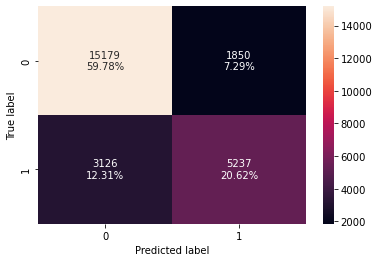

In [255]:
# creating confusion matrix
confusion_matrix_statsmodels(lg7, X_train9, y_train)

In [256]:
#Checking model performance stats 
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg7, X_train9, y_train
)

print("Training performance:")
lg7_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804033,0.626211,0.738959,0.677929


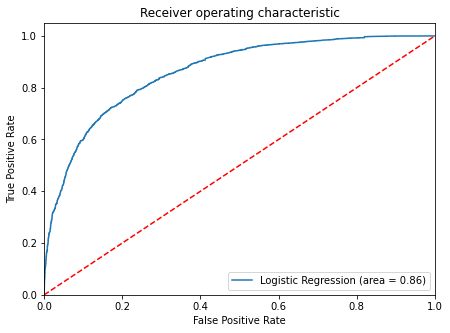

In [257]:
#completing ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg7.predict(X_train9))
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(X_train9))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [258]:
#finding optimal threshold to improve recall 
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(X_train9))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.30893774503410903


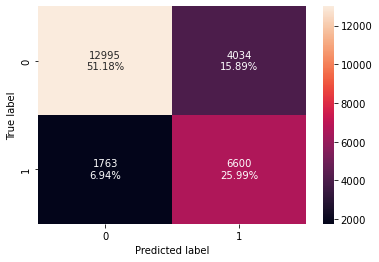

In [259]:
#recreating confusion matrix with this new threshold 

confusion_matrix_statsmodels(
    lg7, X_train9, y_train, threshold=optimal_threshold_auc_roc
)

In [260]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg7, X_train9, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.7717,0.78919,0.620651,0.694847


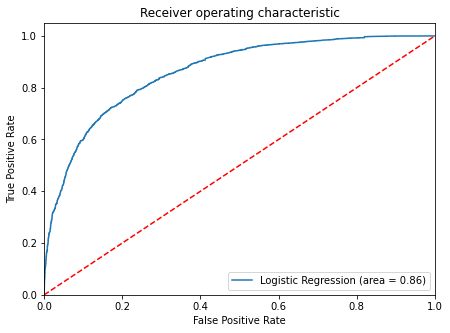

In [261]:
#re-running ROC-AUC curve with new threshold 

logit_roc_auc_train = roc_auc_score(y_train, lg7.predict(X_train9))
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(X_train9))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

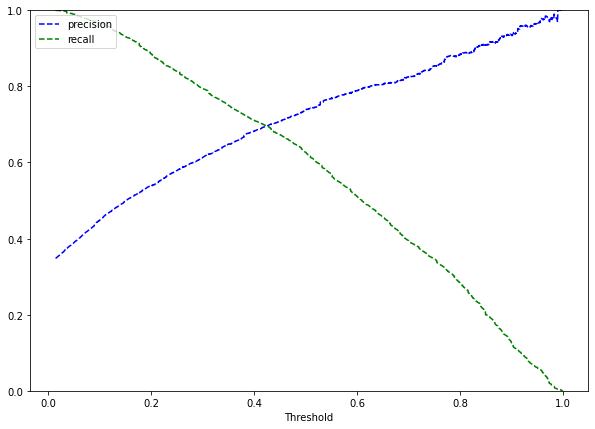

In [262]:
#testing using precision-recall curve for possible better threshold
y_scores = lg7.predict(X_train9)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [263]:
# setting the threshold for precision-recall results 
optimal_threshold_curve_pr = 0.42

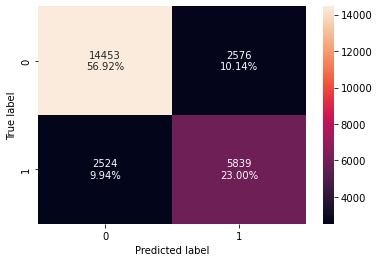

In [264]:
# creating confusion matrix with pr threshold
confusion_matrix_statsmodels(lg7, X_train9, y_train, threshold=optimal_threshold_curve_pr)

In [265]:
#pulling training performance for pr curve 
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg7, X_train9, y_train, threshold=optimal_threshold_curve_pr
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

#recall went WAY down, from .78 to .69, closer to where we were to start with 
#accuracy slightly improved, precision improved as well. Again we're close to where we started with.  
#will go with original threshold 

Training performance:


,Accuracy,Recall,Precision,F1
0,0.799149,0.698194,0.69388,0.696031


In [266]:
#comparing all 3 threshold options 


models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.30 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804033,0.771700,0.799149
Recall,0.626211,0.789190,0.698194
Precision,0.738959,0.620651,0.693880
F1,0.677929,0.694847,0.696031


Comparing all 3 models: 
- Accuracy experienced small change, with the standard and .42 threshold having the highest
    - again, there was minimal adjustment across all 3
- Recall/True Positive Rate was highest for .30 threshold, which is what we want
- Precision was lowest for the .30 threshold, but we want to prioritize recall here 
- F1 also saw minimal adjustments 

We will use the .30 threshold 

### Checking Performance on Test Set 

- change all data to float type 
- remove 
    - type_of_meal_plan_Meal Plan 2
    - type_of_meal_plan_Meal Plan 3	
    - room_type_reserved_Room_Type 3	
    - arrival_year                             
    - arrival_date                             
    - market_segment_type_Online
    - no_of_previous_bookings_not_canceled    

In [267]:
#Adjusting test data to match train 

#test
X_test.head().T

,30392,6685,8369,2055,10969
const,1.00,1.0,1.00,1.0,1.0
no_of_adults,1.00,2.0,2.00,2.0,1.0
no_of_children,0.00,0.0,0.00,0.0,0.0
no_of_weekend_nights,1.00,1.0,2.00,0.0,2.0
no_of_week_nights,0.00,2.0,3.00,2.0,4.0
required_car_parking_space,0.00,0.0,0.00,0.0,0.0
lead_time,53.00,63.0,55.00,53.0,245.0
arrival_month,9.00,4.0,9.00,12.0,7.0
arrival_date,11.00,22.0,11.00,29.0,6.0
repeated_guest,0.00,0.0,0.00,0.0,0.0


In [268]:
X_test9 = X_test[X_test.columns].astype(float)
X_test9 = X_test9.copy().drop(["type_of_meal_plan_Meal Plan 2","type_of_meal_plan_Meal Plan 3","room_type_reserved_Room_Type 3","arrival_date","market_segment_type_Online","no_of_previous_bookings_not_canceled","market_segment_type_Complementary"], axis=1)
X_test9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 30392 to 9399
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           10883 non-null  float64
 1   no_of_adults                    10883 non-null  float64
 2   no_of_children                  10883 non-null  float64
 3   no_of_weekend_nights            10883 non-null  float64
 4   no_of_week_nights               10883 non-null  float64
 5   required_car_parking_space      10883 non-null  float64
 6   lead_time                       10883 non-null  float64
 7   arrival_month                   10883 non-null  float64
 8   repeated_guest                  10883 non-null  float64
 9   no_of_previous_cancellations    10883 non-null  float64
 10  avg_price_per_room              10883 non-null  float64
 11  no_of_special_requests          10883 non-null  float64
 12  type_of_meal_plan_Not Selecte

In [269]:
#double checking columns match the latest train9 data 
X_train9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25392 non-null  float64
 1   no_of_adults                    25392 non-null  float64
 2   no_of_children                  25392 non-null  float64
 3   no_of_weekend_nights            25392 non-null  float64
 4   no_of_week_nights               25392 non-null  float64
 5   required_car_parking_space      25392 non-null  float64
 6   lead_time                       25392 non-null  float64
 7   arrival_month                   25392 non-null  float64
 8   repeated_guest                  25392 non-null  float64
 9   no_of_previous_cancellations    25392 non-null  float64
 10  avg_price_per_room              25392 non-null  float64
 11  no_of_special_requests          25392 non-null  float64
 12  type_of_meal_plan_Not Select

### Testing standard threshold model on Test data 

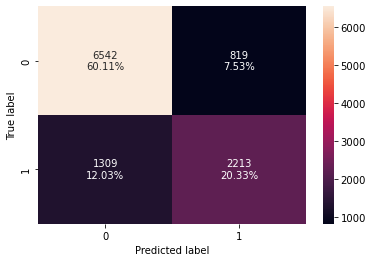

In [270]:
#running using Model with default threshold 
# creating confusion matrix
confusion_matrix_statsmodels(lg7, X_test9, y_test)

In [271]:
#verifying stats with the standard threshold on test data 
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg7, X_test9, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804466,0.628336,0.729881,0.675313


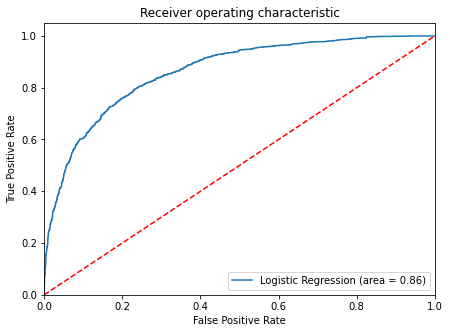

In [272]:
#ROC Curve on test set, standard threshold 
logit_roc_auc_test = roc_auc_score(y_test, lg7.predict(X_test9))
fpr, tpr, thresholds = roc_curve(y_test, lg7.predict(X_test9))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Testing using .30 threshold (preferred based on train data) 

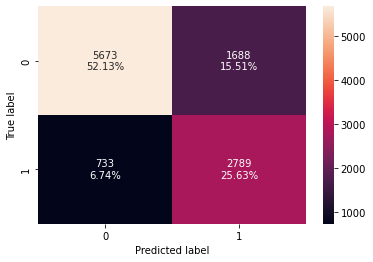

In [273]:
# creating confusion matrix .30 optimal threshold auc roc 
confusion_matrix_statsmodels(lg7, X_test9, y_test, threshold=optimal_threshold_auc_roc)

In [274]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg7, X_test9, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.777543,0.79188,0.622962,0.697337


#### Using .42 threshold - curve perfected

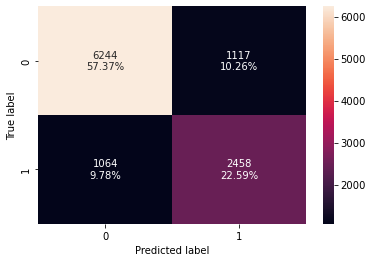

In [275]:
# creating confusion matrix
confusion_matrix_statsmodels(lg7, X_test9, y_test, threshold=optimal_threshold_curve_pr)

In [276]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg7, X_test9, y_test, threshold=optimal_threshold_curve_pr
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.799596,0.697899,0.687552,0.692687


In [277]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.30 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804033,0.771700,0.799149
Recall,0.626211,0.789190,0.698194
Precision,0.738959,0.620651,0.693880
F1,0.677929,0.694847,0.696031


In [278]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression statsmodel",
    "Logistic Regression-0.30 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression statsmodel,Logistic Regression-0.30 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.804466,0.777543,0.799596
Recall,0.628336,0.791880,0.697899
Precision,0.729881,0.622962,0.687552
F1,0.675313,0.697337,0.692687


## Final Model Summary

#### Model Performance is finalized 
- All the models are performing similarly on both test and training set 
- The best model uses an optimal threshold of .30 
    - This optimizes REcall with a slight dip in precision for the best balance of resource use vs loss due to cancellation
    - This model will help the hotel identify customers who are more likely to cancel but will take extra time since more individuals may be identified than will actually cancel 
    - I recommend using that model first, as the dip in precision is not extensive and the resource use is only slightly higher than the .42 threshold 


## Building a Decision Tree model

In [279]:
#data3 is ready to split into training. Making a copy for decision tree dataset 
data4 = data3.copy()
data4.head().T

,0,1,2,3,4
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_month,10,11,2,5,4
arrival_date,2,6,28,20,11


In [280]:
#splitting out target 
X2 = data3.drop("booking_status", axis=1)
y2 = data3["booking_status"]

X2.head().T

,0,1,2,3,4
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_month,10,11,2,5,4
arrival_date,2,6,28,20,11


In [281]:
#creating dummy variables in this dataset
X2 = pd.get_dummies(X2, drop_first=True)

X2.head().T

,0,1,2,3,4
no_of_adults,2.0,2.00,1.0,2.0,2.0
no_of_children,0.0,0.00,0.0,0.0,0.0
no_of_weekend_nights,1.0,2.00,2.0,0.0,1.0
no_of_week_nights,2.0,3.00,1.0,2.0,1.0
required_car_parking_space,0.0,0.00,0.0,0.0,0.0
lead_time,224.0,5.00,1.0,211.0,48.0
arrival_month,10.0,11.00,2.0,5.0,4.0
arrival_date,2.0,6.00,28.0,20.0,11.0
repeated_guest,0.0,0.00,0.0,0.0,0.0
no_of_previous_cancellations,0.0,0.00,0.0,0.0,0.0


In [282]:
#transitioning all columns to float type
X2 = X2[X2.columns].astype(float)

X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  float64
 1   no_of_children                        36275 non-null  float64
 2   no_of_weekend_nights                  36275 non-null  float64
 3   no_of_week_nights                     36275 non-null  float64
 4   required_car_parking_space            36275 non-null  float64
 5   lead_time                             36275 non-null  float64
 6   arrival_month                         36275 non-null  float64
 7   arrival_date                          36275 non-null  float64
 8   repeated_guest                        36275 non-null  float64
 9   no_of_previous_cancellations          36275 non-null  float64
 10  no_of_previous_bookings_not_canceled  36275 non-null  float64
 11  avg_price_per_r

In [283]:
y2.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: booking_status, dtype: float64

In [284]:
#creating test and train sets 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.30, random_state=1)


In [285]:
#build tree using DecisionTreeClassifier using default gini 
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=1)

### Scoring the tree 

In [286]:
#Checking accuracy on train vs test set: 

print("Accuracy on training set : ",dTree.score(X2_train, y2_train))
print("Accuracy on test set : ",dTree.score(X2_test, y2_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8699807038500413


In [287]:
#Checking number of positives
print('Total Positives out of 36,275:',y2.sum(axis = 0))

Total Positives out of 36,275: 11885.0


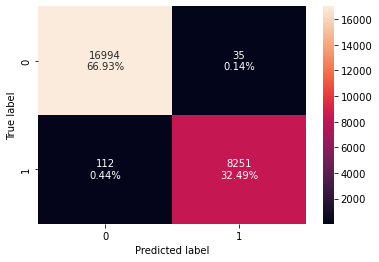

In [288]:
#confusion matrix for initial decision tree
confusion_matrix_statsmodels(dTree, X2_train, y2_train)

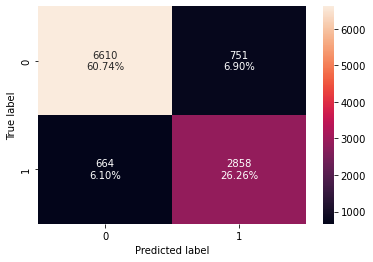

In [289]:
#confusion matrix for initial decision tree
confusion_matrix_statsmodels(dTree, X2_test, y2_test)

In [290]:
dtreemodel_train_stats = model_performance_classification_statsmodels(
    dTree, X2_train, y2_train, 
)
print("dTree Train performance:")
dtreemodel_train_stats

dTree Train performance:


,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


In [291]:
dtreemodel_test_stats = model_performance_classification_statsmodels(
    dTree, X2_test, y2_test, 
)
print("dTree Test performance:")
dtreemodel_test_stats

dTree Test performance:


,Accuracy,Recall,Precision,F1
0,0.869981,0.811471,0.791909,0.801571


In [292]:
#defining columns for visualizing the tree 
feature_names = list(X2.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


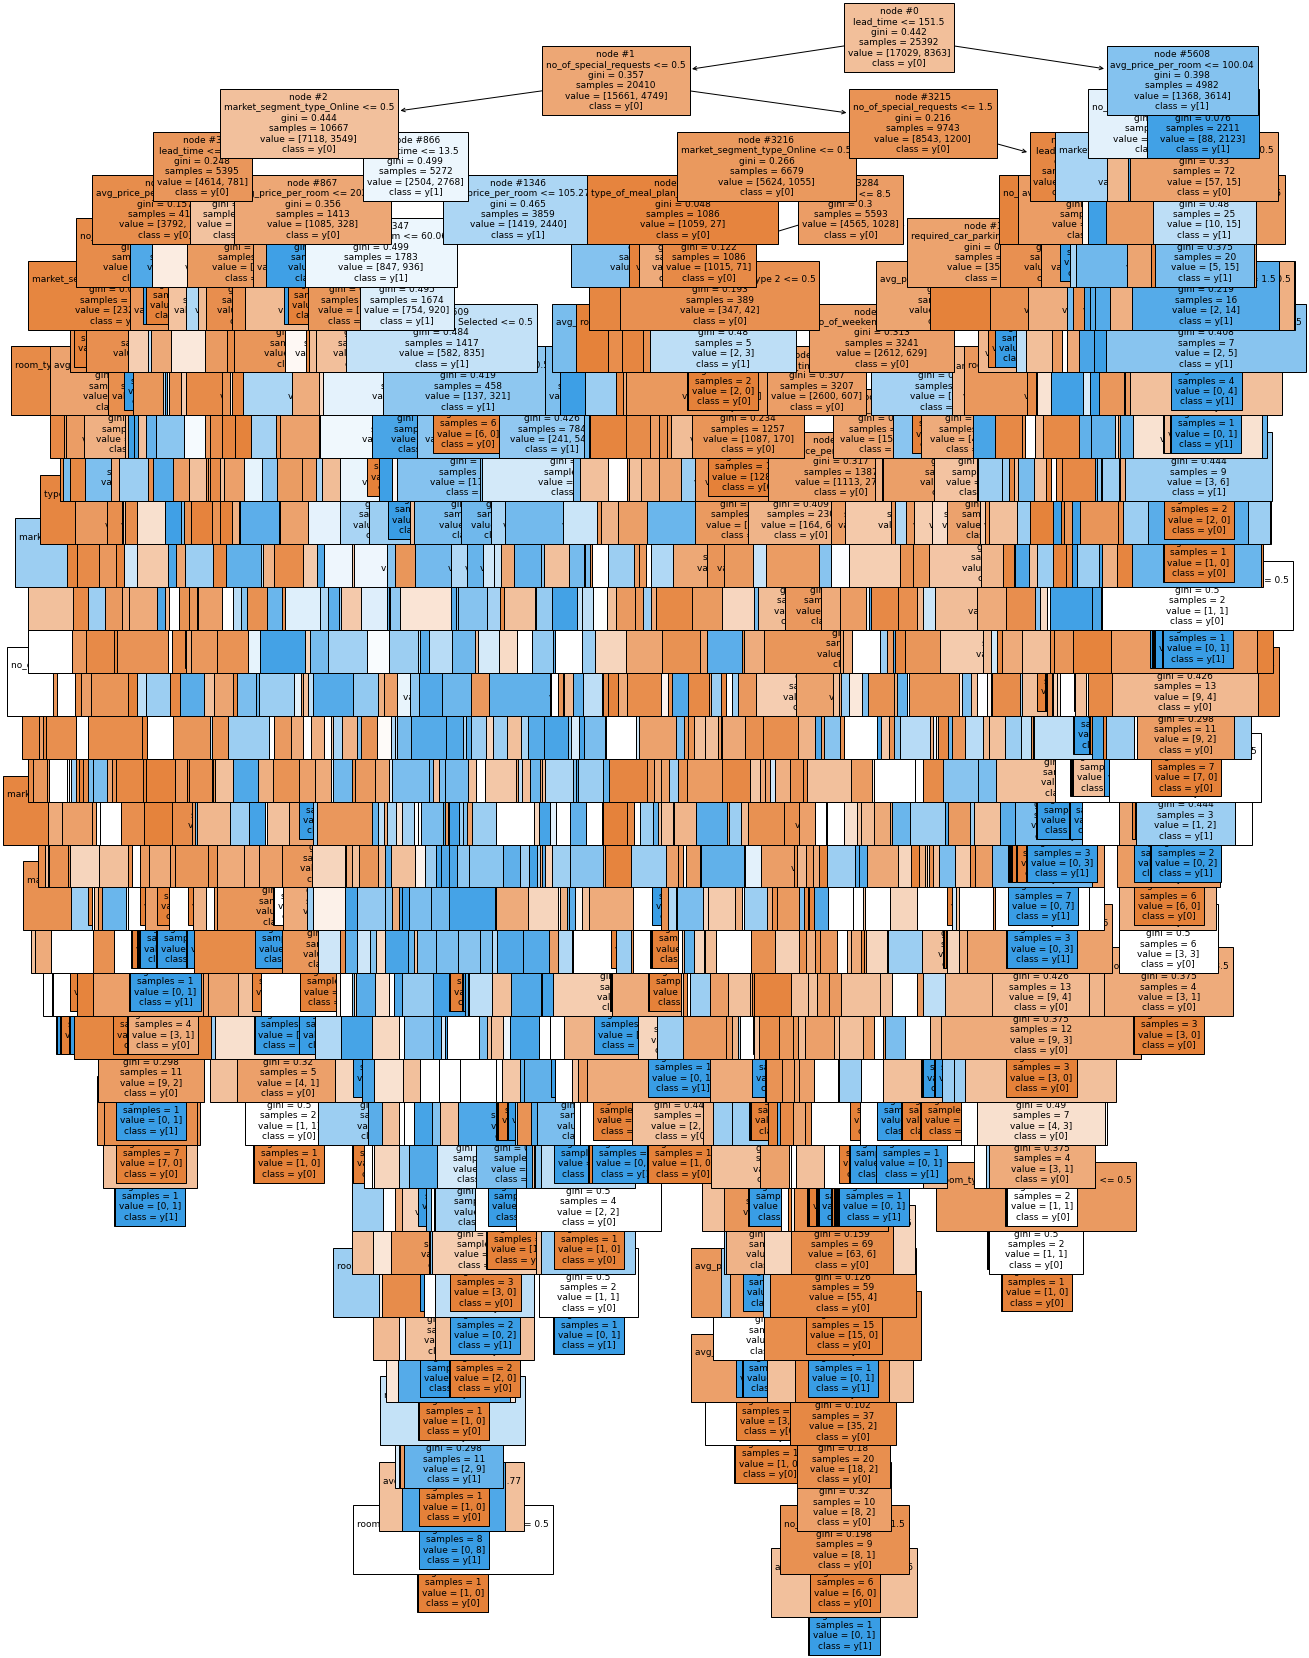

In [158]:
#printing the tree 
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [293]:
#Gini importance for each feature 

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X2_train.columns).sort_values(by = 'Imp', ascending = False)) 

                                           Imp
lead_time                             0.351376
avg_price_per_room                    0.174860
market_segment_type_Online            0.092345
arrival_date                          0.090892
arrival_month                         0.067822
no_of_special_requests                0.067609
no_of_week_nights                     0.047744
no_of_weekend_nights                  0.039557
no_of_adults                          0.025871
type_of_meal_plan_Not Selected        0.009441
required_car_parking_space            0.006834
room_type_reserved_Room_Type 4        0.006175
no_of_children                        0.005522
type_of_meal_plan_Meal Plan 2         0.004557
market_segment_type_Offline           0.003830
room_type_reserved_Room_Type 2        0.002125
room_type_reserved_Room_Type 5        0.001163
market_segment_type_Corporate         0.000663
room_type_reserved_Room_Type 6        0.000564
room_type_reserved_Room_Type 7        0.000387
repeated_gues

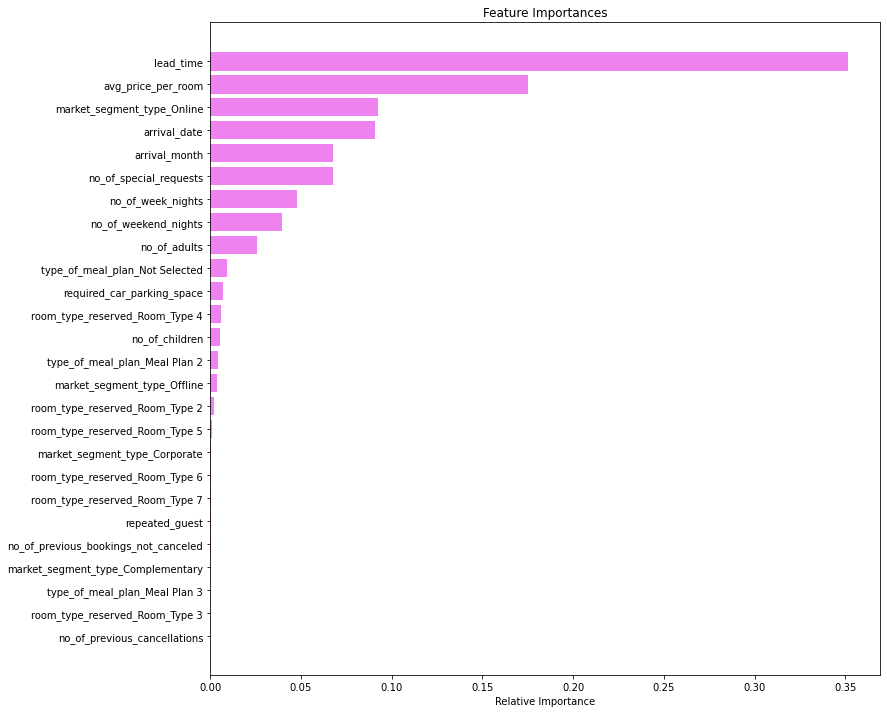

In [294]:
#visualizing importances 
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune the tree?

YES. It's performing fantastic on both train and test data, but it's much too complicated. 

In [295]:
#running complexity pruning path to show the effective alphas, cost complexity parameter.  
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [296]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.007572
1,4.327745e-07,0.007573
2,4.688391e-07,0.007573
3,5.329960e-07,0.007574
4,6.133547e-07,0.007575
...,...,...
1401,6.665684e-03,0.286897
1402,1.304480e-02,0.299942
1403,1.725993e-02,0.317202
1404,2.399048e-02,0.365183


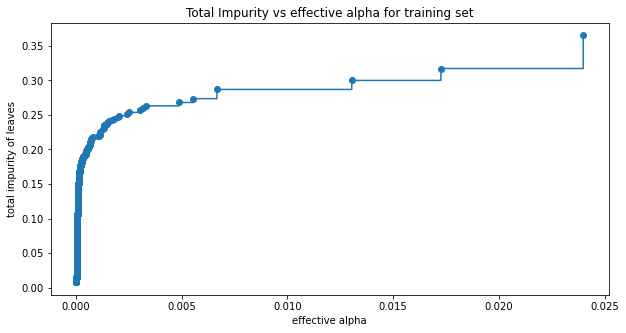

In [297]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [298]:
#training a decision tree using the effective alphas above 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X2_train, y2_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07657789477371357


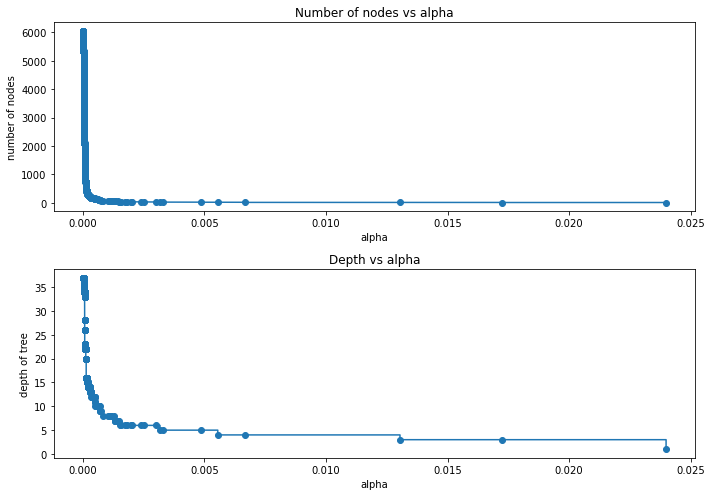

In [299]:
#showing the number of nodes and tree depth decreasing as alpha increases 
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [300]:
#creating scores for train vs test 
train_scores = [clf.score(X2_train, y2_train) for clf in clfs]
test_scores = [clf.score(X2_test, y2_test) for clf in clfs]

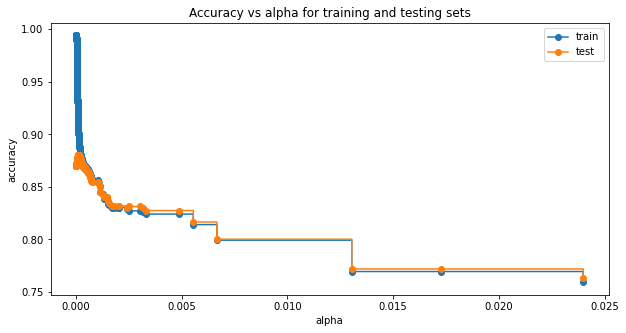

In [301]:
#plotting train vs test scores to see intersection
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [302]:
#finding best index 
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X2_train, y2_train))
print('Test accuracy of best model: ',best_model.score(X2_test, y2_test))

DecisionTreeClassifier(ccp_alpha=9.957064714636189e-05, random_state=1)
Training accuracy of best model:  0.9120982986767486
Test accuracy of best model:  0.8805476431131122


In [303]:
#training the set further on recall 
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X2_train)
    values_train=metrics.recall_score(y2_train,pred_train3)
    recall_train.append(values_train)

In [304]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X2_test)
    values_test=metrics.recall_score(y2_test,pred_test3)
    recall_test.append(values_test)

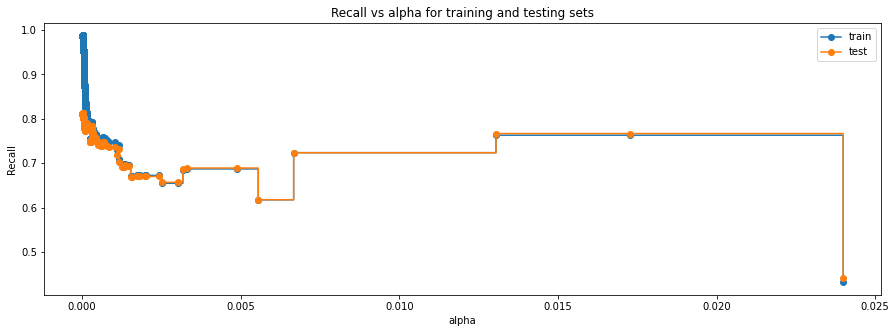

In [305]:
#visualizing the scores 
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [306]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.077317767298863e-05, random_state=1)


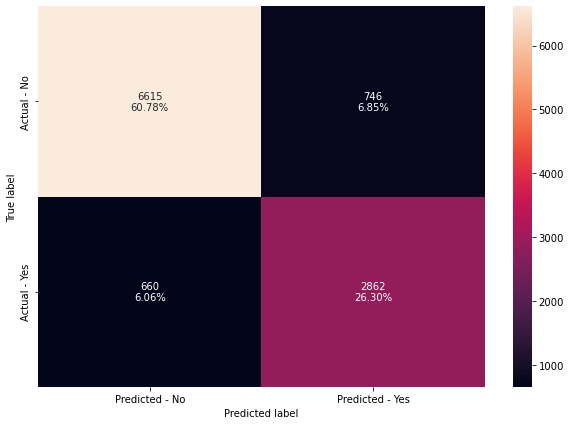

In [307]:
#confusion matrix on the best recall trained model above 
make_confusion_matrix(best_model,y2_test)

In [308]:
dtreemodel_train_stats_bestmodel = model_performance_classification_statsmodels(
    best_model, X2_train, y2_train, 
)
print("dTree best model Train performance:")
dtreemodel_train_stats_bestmodel

dTree best model Train performance:


,Accuracy,Recall,Precision,F1
0,0.993738,0.986966,0.993979,0.99046


In [309]:
dtreemodel_test_stats_bestmodel = model_performance_classification_statsmodels(
    best_model, X2_test, y2_test, 
)
print("dTree best model test performance:")
dtreemodel_test_stats_bestmodel

dTree best model test performance:


,Accuracy,Recall,Precision,F1
0,0.870808,0.812606,0.793237,0.802805


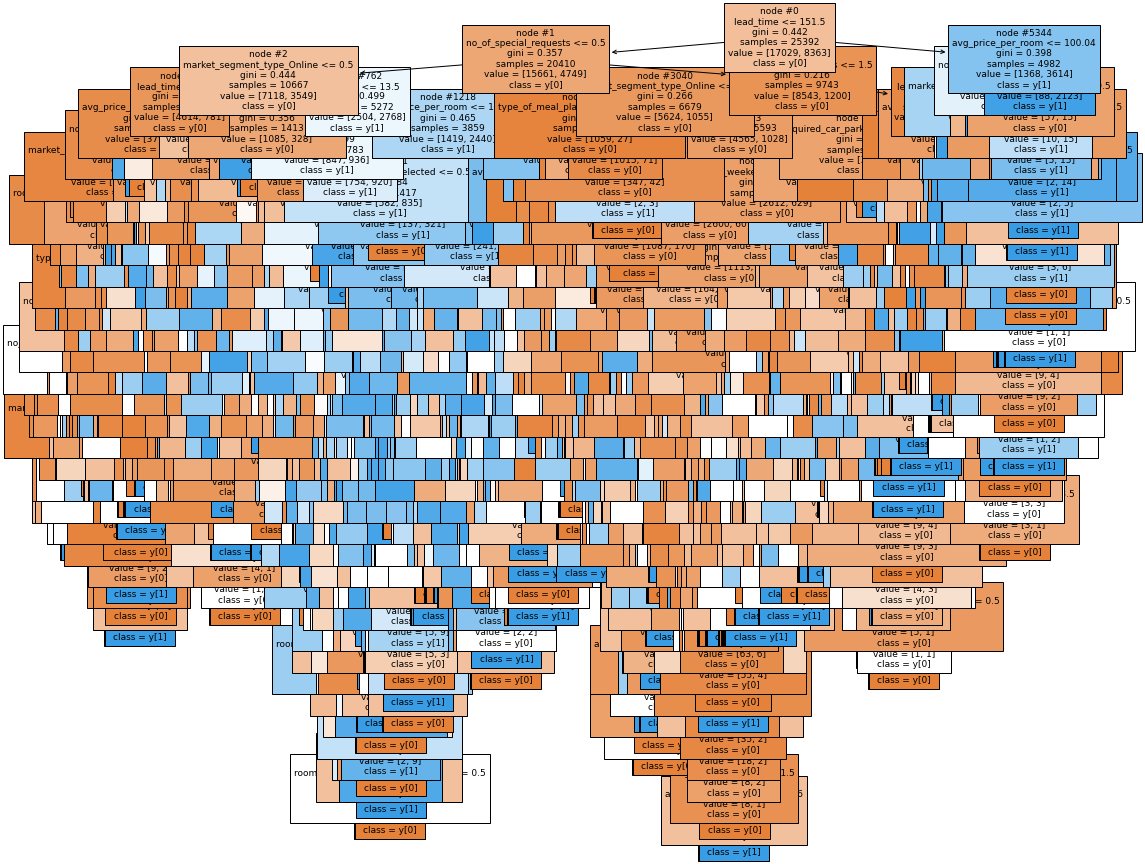

In [184]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

Before pruning we already had great scores, but they have improved across all 3 

In [310]:
#re-running importance features 

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train2.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
required_car_parking_space            0.351464
no_of_previous_bookings_not_canceled  0.174848
market_segment_type_Offline           0.092739
arrival_month                         0.090501
avg_price_per_room                    0.067867
lead_time                             0.067727
no_of_weekend_nights                  0.047590
no_of_children                        0.039473
const                                 0.025916
type_of_meal_plan_Meal Plan 3         0.009404
no_of_week_nights                     0.006863
room_type_reserved_Room_Type 3        0.006201
no_of_adults                          0.005494
no_of_special_requests                0.004553
market_segment_type_Corporate         0.003846
type_of_meal_plan_Not Selected        0.002134
room_type_reserved_Room_Type 4        0.001168
market_segment_type_Complementary     0.000588
room_type_reserved_Room_Type 5        0.000566
room_type_reserved_Room_Type 6        0.000389
arrival_date 

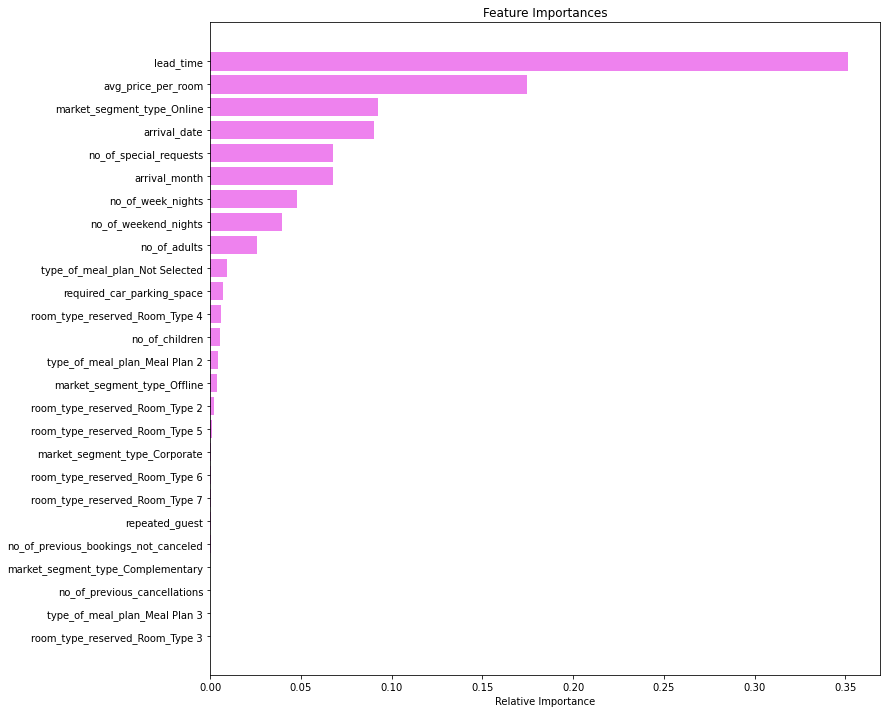

In [311]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model Performance Comparison and Conclusions

In [312]:
#Looking at the initial tree and the post-pruning option, they are both quite similar and have quite high recall values 

dtreemodel_test_stats = model_performance_classification_statsmodels(
    dTree, X2_test, y2_test, 
)
print("dTree Test performance:")
dtreemodel_test_stats

dTree Test performance:


,Accuracy,Recall,Precision,F1
0,0.869981,0.811471,0.791909,0.801571


In [313]:
dtreemodel_test_stats_bestmodel = model_performance_classification_statsmodels(
    best_model, X2_test, y2_test, 
)
print("dTree best model test performance:")
dtreemodel_test_stats_bestmodel

dTree best model test performance:


,Accuracy,Recall,Precision,F1
0,0.870808,0.812606,0.793237,0.802805


We will use the pruned tree method 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

*Thank you for this opportunity! I hope these findings are clear and helpful and give you some solid actions to improve and protect your business*

### A note about COVID: 
- In light of COVID requiring more flexibility around cancellations, these programs should be approached keeping in mind some cancellations are due to government restrictions and safety reasons, and there is a general PR expectation to respond to these requirements with support as a member of these communities 
- It could be possible to implement the following recommendations with adjustments if the cancellation is from a country under strict lockdown, increased COVID rates, etc. 

#### Primary recommendations from both models: 
- ***increased fees and deposit requirements for riskiest variables***
- ***reduce or refuse refund for the riskiest demographics (ex: previous cancellations)***
- ***increasing partnerships and coupons for the safest demographics***

### Findings from Logistic Regression:

- Our model showed bookings with these variables are much less likely to cancel (50%+ less likely) 
    - Required parking space
    - Special requests - the more the better! 
    - Room type 5, 6, or 7 selected 
    - Corporate or Offline Bookings (moreso offline) 

- The following variables also reduced cancellations, but not as strong. 
    - Room type 2 or 4
    - Arriving later in the year (6% decrease per month - later the better!) 

- Our model showed bookings with the following variables are *more* likely to cancel
    - Increased lead time - extra 1% per day! Huge indicator considering some book months in advance 
    - More adults and more children
    - longer stays - moreso increased weekend nights but also slightly week nights 
    - Previous cancellations - 25% more likely for every single cancellation 
    - Increased price of room - extra 2% per euro 



### Findings from Decision Tree:


- The following items had the strongest indication of cancellation: 
    - Lead time 
    - average price per room 
    
- The following had moderate indication of cancellation 
    - Online bookings
    - arrival date 
    - number of special requests 
    - arrival month 
    - number of weeknights 
    - number of weekend nights 

    
- the following had slight indication of cancellation 
    - number of adults 
    - no selected meal plan 
    - required parking space
    - room type 4
    - number of children 
    - meal plan 2
    - Offline segment
    - rooms 2 or 5  
    
    
### Recommendations from both models 

- Provide buffer for longer lead times (one of the strongest indicators across the board) 
    - require deposit for booking more than 3 months ahead
    
- Provide buffer for more expensive rooms 
    

- Online and offline ads/coupons to target those marketing channels 

- Expand corporate partnerships and return customer memberships
    - target safer demographics and encourage repeat customers  

- Reward program for repeat customers who do not cancel 
    - free room upgrades 
    - meal vouchers 
    - points system which resets if they cancel 

- Advertising about specific room features linked to reduced risk 
    - parking spaces
    - room types 4, 2, or 5
    - meal plans, particulary #2 
    
- Providing buffer around riskier months 
    - discounts for later months in the year
    - higher cost for earlier months in the year to offset increasd cancellations  

- Providing buffer for individuals who have cancelled before 
    - Additional fees or up front deposit 
    - refusal or reduction of refunds if they cancel again 
    

  
- Longer stays were only slightly more likely to cancel, possibility to need buffer 
    - require deposit for stays longer than a week to test as a threshold 